In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.datasets import make_moons
from sklearn.utils import shuffle

In [2]:
n = 10016
batch_size = 32

In [3]:
X, Y = make_moons(n_samples=n, noise=0.1)
X, Y = shuffle(X, Y, random_state=72)

In [4]:
Xs = []
Ys = []
batch_num = int(np.ceil(len(X) / batch_size))

In [5]:
for i in range(batch_num):
    start = i * batch_size
    end = start + batch_size
    Xs.append(X[start:end])
    Ys.append(Y[start:end])

In [11]:
Xs = np.array(Xs).reshape(batch_num, batch_size, 2, 1)
Ys = np.array(Ys).reshape(batch_num, batch_size, 1, 1)
X = X.reshape(n, 2, 1)
Y = Y.reshape(n, 1, 1)

In [12]:
size = [2, 4, 4, 3, 2, 1]

In [13]:
weights = [0]
biases = [0]
for i in range(0, len(size) - 1):
    weights.append(np.random.rand(size[i + 1], size[i]))
    biases.append(np.random.rand(size[i + 1], 1))

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [15]:
def L(y_hat, y):
    return 0.5 * (y_hat - y) ** 2

In [21]:
def feed_forward(xi, weights, biases):
    activations = [xi]
    z1 = weights[1] @ xi + biases[1]
    a1 = sigmoid(z1)
    activations.append(a1)
    for i in range(2, len(weights)):
        zn = weights[i] @ activations[-1] + biases[i]
        an = sigmoid(zn)
        activations.append(an)
    return activations

In [23]:
def sigmoid_derivative(y):
    return y * ( 1 - y )

In [25]:
def backprop(weights, biases, xi, y, activations):
    deltas = [0] * 6
    dL_dwK = [0] * 6
    dL_dbK = [0] * 6
    
    deltas[5] = ( activations[-1] - y ) * sigmoid_derivative(activations[-1])
    dL_dwK[5] = deltas[5] @ activations[4].T
    dL_dbK[5] = deltas[5]
    
    for i in range(4, 0, -1):
        deltas[i] = ( weights[i+1].T @ deltas[ i + 1 ] ) * sigmoid_derivative(activations[i])
        dL_dwK[i] = deltas[i] @ activations[ i - 1 ].T
        dL_dbK[i] = deltas[i]

    
    
    return dL_dwK, dL_dbK

In [27]:
act = feed_forward(Xs[0][2], weights, biases)
bc = backprop(weights, biases, Xs[0][2], Ys[0][2], act)[0]
for w in bc:
    if type(w) is not int: print(w.shape)

(4, 2)
(4, 4)
(3, 4)
(2, 3)
(1, 2)


In [29]:
epochs = 20
lr = 1
loss = []

In [31]:
for i in tqdm(range(epochs)):
    epochloss = 0
    for j in range(batch_num):
        for i, xi in enumerate(Xs[j]):
            activations = feed_forward(xi, weights, biases)
            epochloss += L(activations[-1], Ys[j,i])
    
            dL_dw, dL_db = backprop(weights, biases, xi, Ys[j,i], activations)
            
            for i, w in enumerate(weights):
                w -= lr * dL_dw[i]
            for i, b in enumerate(biases):
                b -= lr * dL_db[i]
            
    loss.append(epochloss / n)

100%|███████████████████████████████████████████| 20/20 [00:08<00:00,  2.22it/s]


In [32]:
weights

[0,
 array([[  8.48569113,  -3.7987624 ],
        [  1.12073327,  -8.87899459],
        [-10.17809915,  -8.37501514],
        [ 10.09047295,  -6.54497331]]),
 array([[ 3.24433797,  2.73545157,  4.69060124,  3.18930156],
        [ 5.61914294,  3.00706028,  4.75246295,  3.61864613],
        [ 3.63851499,  2.66562462,  2.06813193,  5.59308856],
        [-2.22627277, -2.36734523, -5.03147965, -0.73153439]]),
 array([[ 2.68378726,  3.84969844,  2.34964012, -2.89676738],
        [ 2.25959898,  2.90290317,  4.35820953, -2.09111202],
        [ 2.85472734,  3.59235109,  2.0996138 , -3.02948507]]),
 array([[-3.16459273, -4.27197932, -2.48705949],
        [-3.99126564, -1.9673482 , -3.03743646]]),
 array([[-6.02697632, -5.67975779]])]

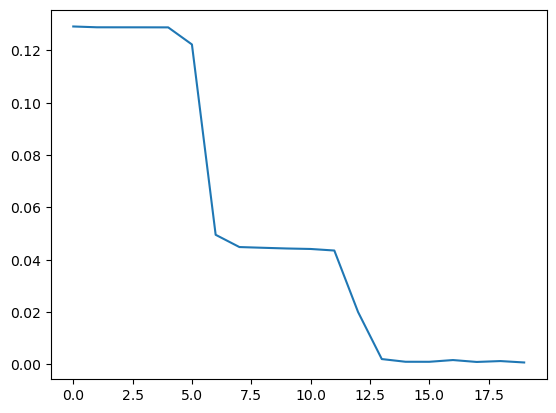

In [33]:
xcoord = np.array([n for n in range(epochs)]).reshape(epochs, 1)
ycoord = np.array(loss).reshape(epochs, 1)
plt.plot(xcoord, ycoord)
#plt.xscale('log')
#plt.yscale('log')

In [37]:
def evaluate_visually(x, w, b):
    rb = []
    for xi in x:
        predictions = feed_forward(xi, w, b)
        if predictions[-1] <= 0.5: rb.append('red')
        else: rb.append('blue')
    return rb

In [39]:
rb = evaluate_visually(X.reshape(n, 2, 1), weights, biases)

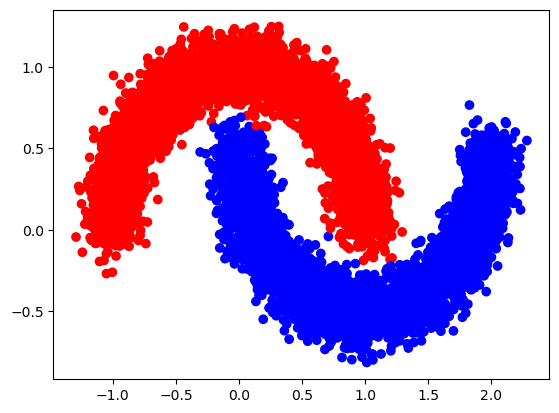

In [40]:
plt.scatter(Xs[:,:,0,:], Xs[:,:,1,:], c=rb)

In [43]:
def evaluate_errors(x, w, b, y):
    rb = []
    for i, xi in enumerate(x):
        p = 0
        predictions = feed_forward(xi, w, b)
        if predictions[-1] <= 0.5: p = 0
        else: p = 1
        if p == Y[i, 0]:
            rb.append('gray')
        else: rb.append('red')
    return rb

In [45]:
br = evaluate_errors(X, weights, biases, Y)

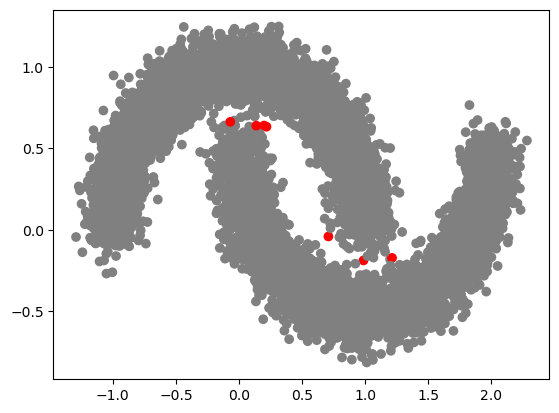

In [46]:
plt.scatter(X[:,0,:], X[:,1,:], c=br)